## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import mixture
from sklearn import preprocessing
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

## Reading data

In [2]:
def read_data(folder):
    file_path = "../data/50mph/" + str(folder) + "/" + str(folder) + "_Step1.csv"
    data = np.abs(pd.read_csv(file_path))
    data["movement_x"] = 0
    data["movement_y"] = 0
    data["movement_z"] = 0

    for i in range(1,303):
        35
        # create file path
        file_path_1 = "../data/50mph/" + str(folder) + "/" + str(folder) + "_Step" + str(i) + ".csv"
        file_path_2 = "../data/50mph/" + str(folder) + "/" + str(folder) + "_Step" + str(i+1) + ".csv"
        print(file_path_1)
        # read in file 
        data_1 = pd.read_csv(file_path_1)
        data_2 = pd.read_csv(file_path_2)

        # calculate movement in x,y,z directions
        data.iloc[:,20:23] = data.iloc[:,20:23] + np.abs(data_2.iloc[:,2:5] - data_1.iloc[:,2:5]).values

        # sum values
        data.iloc[:,5:20] = data.iloc[:,5:20] + np.abs(data_2.iloc[:,5:20])
        
        return data


## Data Preprocess

In [3]:
def feature_engineering(data):
    data["velocity"] = np.sqrt(data["velocity_vx"]**2 + 
                               data["velocity_vy"]**2 + 
                               data["velocity_vz"]**2)
    
    data["movement"] = np.sqrt(data["movement_x"]**2 + 
                               data["movement_y"]**2 + 
                               data["movement_z"]**2)
    
    data["Fsc"] = np.sqrt(data["Fsc_x"]**2 + 
                          data["Fsc_y"]**2 + 
                          data["Fsc_z"]**2)
    
    data["F"] = np.sqrt(data["F_x"]**2 + 
                        data["F_y"]**2 + 
                        data["F_z"]**2)
    return data

def util_winsorization(data):
    p = 0.95
    quantile_value = np.quantile(data, p)
    
    data = data.apply(lambda x: x if x < quantile_value else quantile_value)
    
    return data
    
def data_preprocess(data):
    # take natural logarithm for some columns
    min_value = 1e-5
    data.iloc[:,8:28] = np.log(data.iloc[:,8:28] + min_value)
    
    # winsorization
    data.iloc[:,8:28] = data.iloc[:,8:28].apply(util_winsorization, axis = 0)
    
    # data standardization 
    tmp = pd.DataFrame(preprocessing.scale(data.iloc[:,1:28]))
    tmp.columns = data.columns[1:28]
    data.iloc[:,1:28] = tmp
    
    return data

def plot_coordinate(data, label):
    color_map = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'black', 4: 'white',
                 5: 'green', 6: 'magenta', 7: 'cyan'}
    color = [color_map[labels] for labels in label ]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection = '3d')
    x, y, z = data["centroid_x"], data["centroid_y"], data["centroid_z"]
    ax.scatter(x, y, z, s = 2, c=color, marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()


In [15]:
folder = "cb_d16out"
data = read_data(folder)
data = feature_engineering(data)
data = data_preprocess(data)
data.head()

../data/50mph/cb_d16out/cb_d16out_Step1.csv


,part_num,mass,centroid_x,centroid_y,centroid_z,minertial_x,minertial_y,minertial_z,velocity_vx,velocity_vy,...,F_x,F_y,F_z,movement_x,movement_y,movement_z,velocity,movement,Fsc,F
0,1.0,-0.145457,-1.739893,-1.640071,-1.430111,-0.544007,-0.551443,-0.552824,-2.186772,-1.971328,...,-0.353383,-0.407303,0.396167,-1.016088,-0.908010,-1.010276,-2.564708,-1.261277,0.760378,0.186598
1,2.0,0.287383,-1.711630,-1.271303,-1.267923,1.380740,1.080333,1.179100,-1.593737,-1.066530,...,-0.577226,-0.734543,0.029277,-1.032068,-0.921503,-0.986844,-1.746962,-1.269366,0.417738,-0.172647
2,3.0,-0.021274,-1.627153,-1.501436,-1.402663,-0.223544,-0.201739,-0.215056,-2.244855,-1.658207,...,1.254200,1.291526,1.292519,-1.040931,-0.917448,-0.988699,-2.316197,-1.274936,1.061474,1.248886
3,4.0,-0.122468,-1.480740,-1.647828,-1.430168,-0.508953,-0.481964,-0.501445,-1.357323,-2.365754,...,1.254200,1.291526,1.292519,-1.087822,-0.928643,-1.012612,-1.954739,-1.313941,1.061474,1.248886
4,5.0,0.878378,-1.307198,-1.504198,-1.092644,7.756268,7.036813,5.378165,-0.453276,-1.642775,...,-1.102486,-0.752934,-0.344686,-0.959518,-0.876371,-0.988494,-1.002326,-1.214181,0.410310,-0.537028


In [16]:
# check if preprocessing works
data.describe()

,part_num,mass,centroid_x,centroid_y,centroid_z,minertial_x,minertial_y,minertial_z,velocity_vx,velocity_vy,...,F_x,F_y,F_z,movement_x,movement_y,movement_z,velocity,movement,Fsc,F
count,11426.000000,11426.000000,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,...,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04,1.142600e+04
mean,5722.298617,0.000000,-1.965093e-16,1.318353e-16,2.387961e-16,-4.166494e-17,-2.114340e-17,5.223664e-17,-5.969902e-17,-4.377928e-16,...,-4.974919e-17,-9.949837e-18,-1.989967e-17,9.352847e-16,2.208864e-15,3.183948e-16,1.790971e-16,1.233780e-15,-1.989967e-17,7.959870e-17
std,3305.736618,1.000044,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,...,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,1.000000,-0.255060,-2.136212e+00,-1.717329e+00,-1.536677e+00,-6.956661e-01,-6.959391e-01,-6.966717e-01,-4.514644e+00,-4.051154e+00,...,-4.501150e+00,-4.455733e+00,-5.107256e+00,-1.093727e+00,-9.305157e-01,-1.012612e+00,-5.113075e+00,-1.318324e+00,-4.769358e+00,-5.219982e+00
25%,2860.250000,-0.156070,-8.209312e-01,-8.610032e-01,-8.644806e-01,-5.686411e-01,-5.683549e-01,-5.691051e-01,-5.390587e-01,-6.080104e-01,...,-3.567163e-01,-3.580081e-01,-2.937685e-01,-7.908604e-01,-7.576520e-01,-8.144831e-01,-5.116666e-01,-7.938076e-01,-3.038082e-01,-3.058594e-01
50%,5719.500000,-0.077584,1.168554e-03,-1.181693e-03,-6.560260e-02,-3.794100e-01,-3.780474e-01,-3.779010e-01,6.646780e-02,2.656255e-02,...,1.099460e-01,1.034492e-01,1.054321e-01,-3.111026e-01,-4.004768e-01,-3.173036e-01,4.892931e-02,-2.520010e-01,1.745562e-01,7.787354e-02
75%,8584.750000,0.078651,8.199496e-01,8.639075e-01,8.204766e-01,1.753666e-01,1.765606e-01,1.742182e-01,6.756439e-01,7.162904e-01,...,6.048084e-01,5.945770e-01,5.114039e-01,5.360588e-01,4.282796e-01,5.035976e-01,6.601826e-01,5.974740e-01,5.878523e-01,5.264916e-01
max,11449.000000,97.698724,2.144399e+00,1.712093e+00,8.975960e+00,7.860641e+00,7.770728e+00,7.231362e+00,1.602144e+00,1.648492e+00,...,1.254200e+00,1.291526e+00,1.292519e+00,2.454767e+00,2.558836e+00,2.459707e+00,1.583103e+00,2.261916e+00,1.061474e+00,1.248886e+00


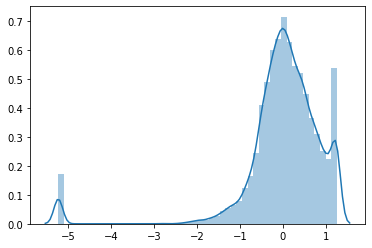

In [17]:
%matplotlib inline

# get a intuition of data distributions
sns.distplot(pd.DataFrame(data["F"]))

## Clustering Analysis

### Center Binding

In [26]:
%matplotlib qt

folder = "cb_d16out"
data = read_data(folder)
data = feature_engineering(data)
data = data_preprocess(data)
data_noxyz = data.drop(['centroid_x', 'centroid_y', 'centroid_z'], axis=1)

# kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(data_noxyz)
# plot_coordinate(data, kmeans.labels_)
print(Counter(kmeans.labels_))

label = pd.DataFrame({'part_num':data["part_num"],'label':kmeans.labels_})
label.to_csv('labels_cb.csv',header=True, index=False)

# Agglomerative Clustering (ward/average/complete/single)
# Agglo = cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 5).fit(data)
# plot_coordinate(data, Agglo.labels_)
# print(Counter(Agglo.labels_))

../data/50mph/cb_d16out/cb_d16out_Step1.csv
Counter({2: 2287, 0: 2287, 1: 2286, 3: 2283, 4: 2283})


### Full Support

In [27]:
folder = "fs_d14out"
data = read_data(folder)
data = feature_engineering(data)
data = data_preprocess(data)
data_noxyz = data.drop(['centroid_x', 'centroid_y', 'centroid_z'], axis=1)

# kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(data_noxyz)
# plot_coordinate(data, kmeans.labels_)
print(Counter(kmeans.labels_))

label = pd.DataFrame({'part_num':data["part_num"],'label':kmeans.labels_})
label.to_csv('labels_fs.csv',header=True, index=False)

# Agglomerative Clustering (ward/average/complete/single)
# Agglo = cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 8).fit(data)
# plot_coordinate(data, Agglo.labels_)
# print(Counter(Agglo.labels_))

../data/50mph/fs_d14out/fs_d14out_Step1.csv
Counter({1: 2132, 2: 2128, 4: 2123, 0: 2119, 3: 2117})


### Lack of Center Support

In [28]:
folder = "locs_d16out"
data = read_data(folder)
data = feature_engineering(data)
data = data_preprocess(data)
data_noxyz = data.drop(['centroid_x', 'centroid_y', 'centroid_z'], axis=1)

# kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(data_noxyz)
# plot_coordinate(data, kmeans.labels_)
print(Counter(kmeans.labels_))

label = pd.DataFrame({'part_num':data["part_num"],'label':kmeans.labels_})
label.to_csv('labels_locs.csv',header=True, index=False)

# Agglomerative Clustering (ward/average/complete/single)
# Agglo = cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 8).fit(data)
# plot_coordinate(data, Agglo.labels_)
# print(Counter(Agglo.labels_))

../data/50mph/locs_d16out/locs_d16out_Step1.csv
Counter({2: 2285, 1: 2285, 0: 2284, 3: 2279, 4: 2272})


### Lack of Rail Seat Support

In [29]:
folder = "lorss_d20out"
data = read_data(folder)
data = feature_engineering(data)
data = data_preprocess(data)
data_noxyz = data.drop(['centroid_x', 'centroid_y', 'centroid_z'], axis=1)

# kmeans clustering
kmeans = cluster.KMeans(n_clusters = 5, n_init = 10, random_state = 0).fit(data_noxyz)
# plot_coordinate(data, kmeans.labels_)
print(Counter(kmeans.labels_))

label = pd.DataFrame({'part_num':data["part_num"],'label':kmeans.labels_})
label.to_csv('labels_lorss.csv',header=True, index=False)

# Agglomerative Clustering (ward/average/complete/single)
# Agglo = cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 8).fit(data)
# plot_coordinate(data, Agglo.labels_)
# print(Counter(Agglo.labels_))

../data/50mph/lorss_d20out/lorss_d20out_Step1.csv
Counter({1: 2358, 0: 2357, 4: 2356, 3: 2355, 2: 2351})
